Look at how Rshock is distributed and compare with analytical solution.
Check how pressure and density behave: adiabatic?

In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import Utilities.prelude as prel
from Utilities.time_extractor import days_since_distruption
from Utilities.operators import make_tree

In [2]:
# Time of the snapshots
t100, _ = days_since_distruption('sedov/100/snap_100.h5')
t100 = t100.sum() #just beacuse it's an array
tfinal, _ = days_since_distruption('sedov/final/snap_final.h5')
tfinal = tfinal.sum()

In [3]:
E = 0.1
den0 = 1
gamma = 5/3
snap = '100'
folder = 'sedov'
path = f'{folder}/{snap}'
if folder == 'TDE':
    is_tde = True
else:
    is_tde = False

In [4]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, IE, Den, Press, Temp = make_tree(path, snap, is_tde, True)
R = np.sqrt(X**2 + Y**2 + Z**2)
Vel = np.sqrt(VX**2 + VY**2 + VZ**2)

all T=0, bro. Compute by myself!


Analytical solution for Sedov blastwave

In [5]:
def analytic_sol(t):
    rv = t * 5/2 
    return rv

def xi_shock(r_known, t_known):
    xi = r_known * (den0/(E * t_known**2))**(1/5)
    return xi

def rsh_expected(xi,t):
    rsh = xi*(E*t**2/den0)**(1/5)
    return rsh

In [6]:
# Load data
shockzone100 = np.loadtxt(f'data/100/shockzone_100.txt')
Xzone100 = shockzone100[0]
Yzone100 = shockzone100[1]
Zzone100 = shockzone100[2]
shockzonefinal = np.loadtxt(f'data/final/shockzone_final.txt')
Xzonefinal = shockzonefinal[0]
Yzonefinal = shockzonefinal[1]
Zzonefinal = shockzonefinal[2]

shock_surface100 = np.loadtxt('data/100/shocksurface_100.txt')
indeces100 = shock_surface100[0]
indeces100 = [int(i) for i in indeces100]
mach100 = shock_surface100[1]
machP100 = shock_surface100[2]
xshock100 = Xzone100[indeces100]
yshock100 = Yzone100[indeces100]
zshock100 = Zzone100[indeces100]

shock_surfacefinal = np.loadtxt('data/final/shocksurface_final.txt')
indecesfinal = shock_surfacefinal[0]
indecesfinal = [int(i) for i in indecesfinal]
machfinal = shock_surfacefinal[1]
xshockfinal = Xzonefinal[indecesfinal]
yshockfinal = Yzonefinal[indecesfinal]
zshockfinal = Zzonefinal[indecesfinal]


In [7]:
# Find the numerical R_shock as the mean of R of the cells in the shock surface --> error = standard deviation 
rshock100 = np.sqrt(xshock100**2 + yshock100**2 + zshock100**2)
R100 = np.mean(rshock100)
errorR100 = np.std(rshock100)
relerr_R100 = errorR100 / R100

rshockfinal = np.sqrt(xshockfinal**2 + yshockfinal**2 + zshockfinal**2)
Rfinal = np.mean(rshockfinal)
errorRfinal = np.std(rshockfinal)
mach_final = np.mean(machfinal)


Visualize bulk quantites

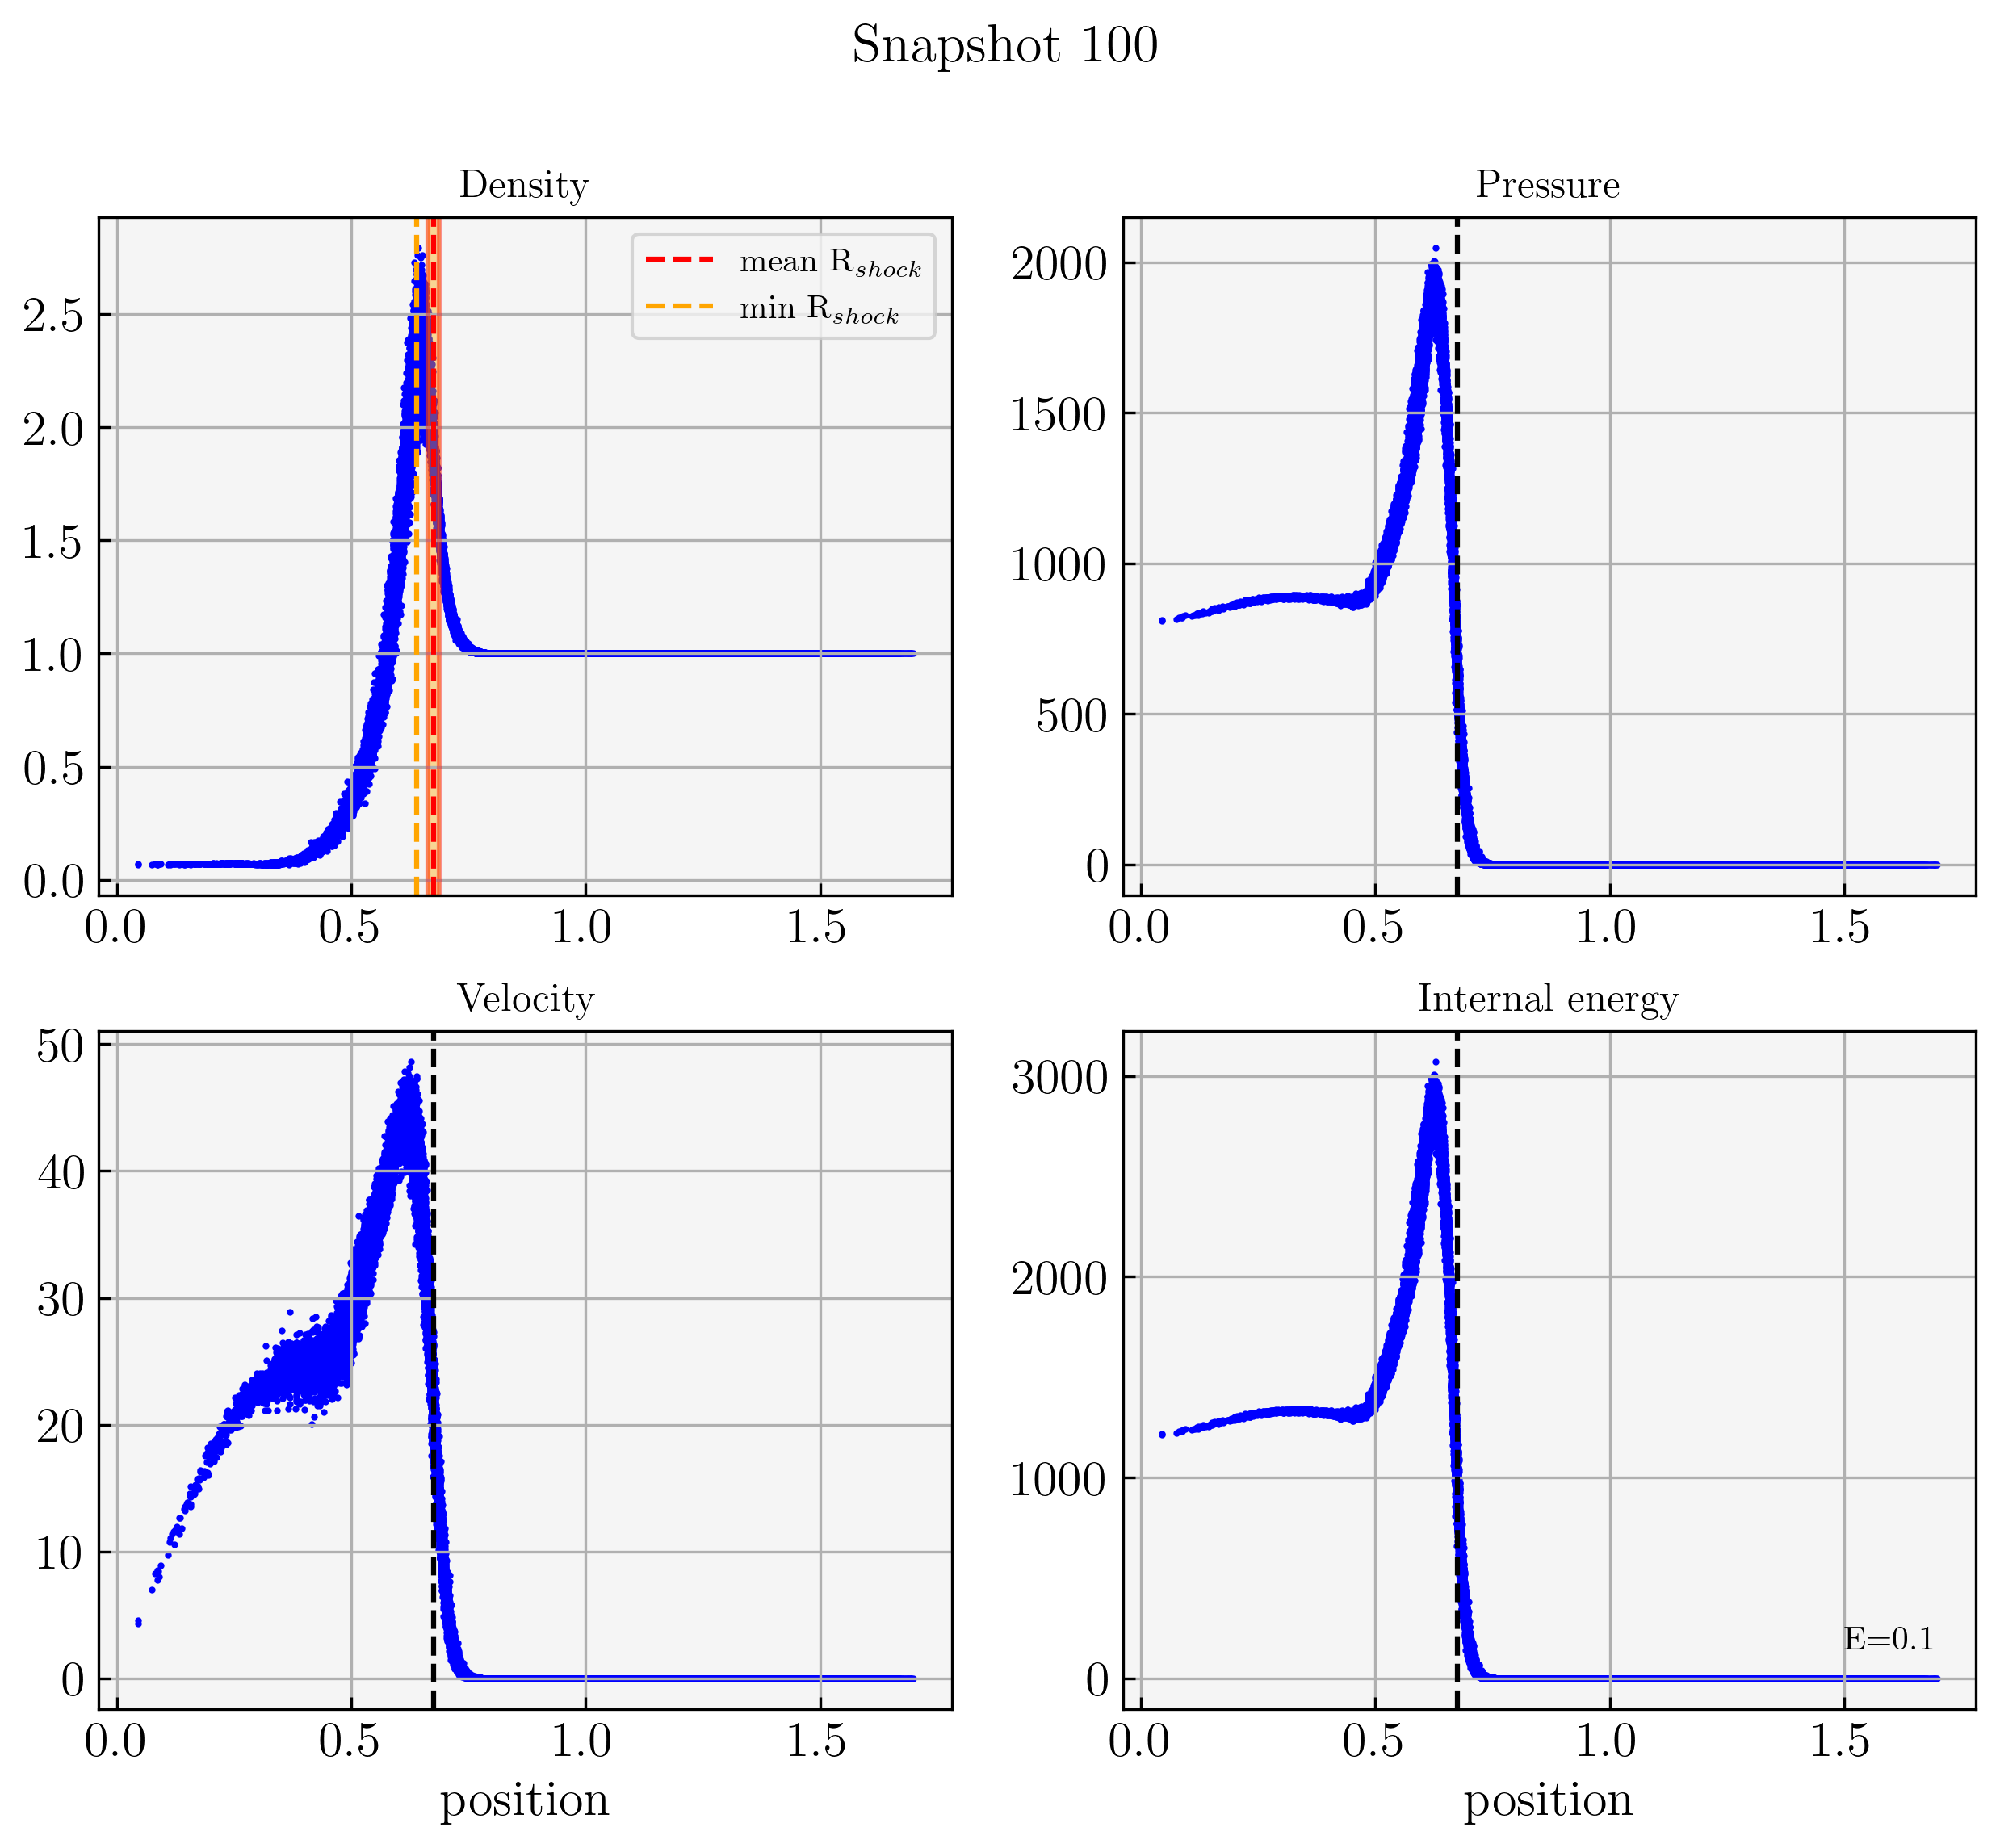

In [22]:
if snap == '100':
    Rshocklim = R100
    Rshockmin = np.min(rshock100)
elif snap == 'final':
    Rshocklim = Rfinal
    
fig, axx = plt.subplots(2,2, figsize=(10,8))
plt.suptitle(f'Snapshot {snap}', fontsize = 16)
axx[0][0].scatter(R, Den, s=1, c = 'b') # I use MY Rshock, not the analytical one
axx[0][0].axvline(Rshocklim, linestyle = '--', c = 'r', label = r'mean R$_{shock}$')
axx[0][0].axvline(Rshockmin, linestyle = '--', c = 'orange', label = r'min R$_{shock}$')
axx[0][0].axvline(Rshocklim-errorR100, alpha = 0.4, color = 'r')
axx[0][0].axvline(Rshocklim+errorR100, alpha = 0.4, color = 'r')
axx[0][0].axvspan(Rshocklim-errorR100, Rshocklim+errorR100, alpha = 0.4, color = 'orange')
axx[0][0].set_title('Density')
axx[0][0].grid()
axx[0][0].legend()

axx[0][1].scatter(R, Press, s=1, c = 'b')
axx[0][1].axvline(Rshocklim, linestyle = '--', c = 'k')
axx[0][1].set_title('Pressure')
axx[0][1].grid()

axx[1][0].scatter(R, Vel, s=1, c = 'b')
axx[1][0].axvline(Rshocklim, linestyle = '--', c = 'k')
axx[1][0].set_title('Velocity')
axx[1][0].grid()

axx[1][1].scatter(R, IE, s=1, c = 'b')
axx[1][1].axvline(Rshocklim, linestyle = '--', c = 'k')
axx[1][1].text(1.5, 150, 'E=0.1')
axx[1][1].set_title('Internal energy')
axx[1][1].grid()

axx[1][0].set_xlabel('position', fontsize = 15)
axx[1][1].set_xlabel('position', fontsize = 15)
plt.savefig(f'Figs/sedov{snap}_quantities.png')

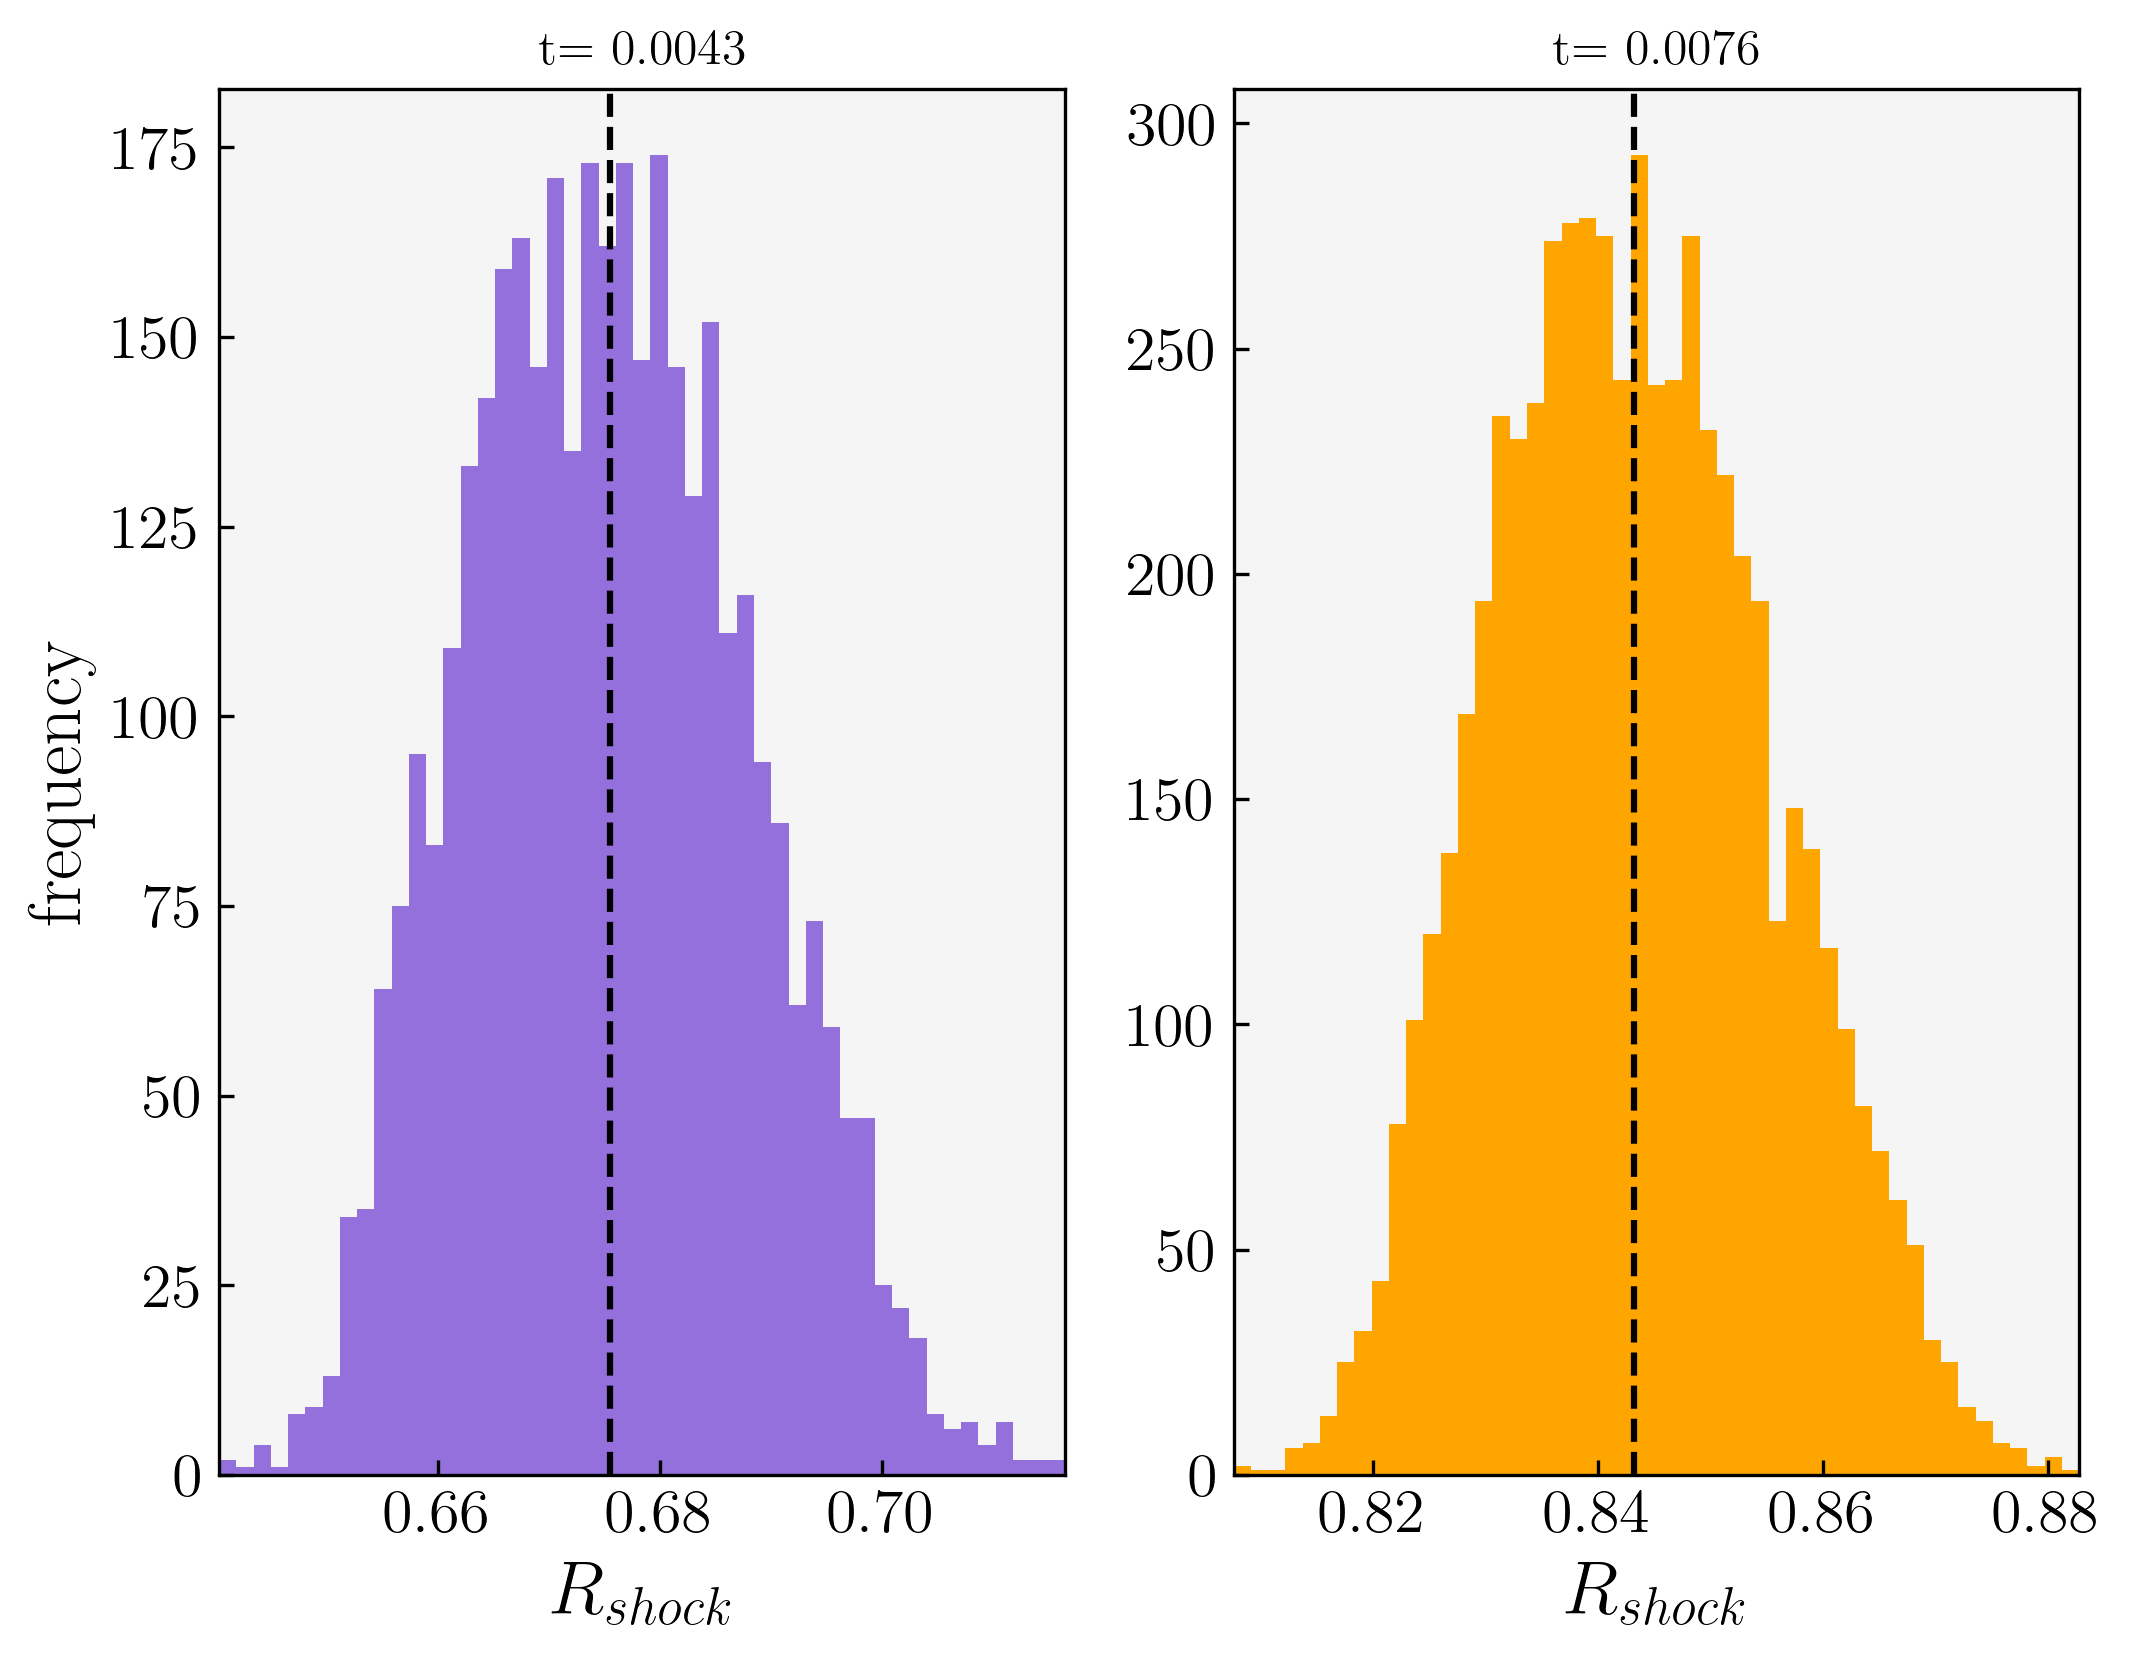

In [9]:
# Ditribution of Rshock
if folder == 'sedov':
    fig, ax = plt.subplots(1,2)
    ax[0].hist(rshock100, bins = np.linspace(np.min(rshock100), np.max(rshock100), 50), color = 'mediumpurple')
    #ax[0].scatter(rshock100, stats.norm.pdf(rshock100, R100, errorR100), s = 1, c = 'k')
    ax[0].axvline(R100, c = 'k', linestyle = '--')
    ax[0].set_xlabel(r'$R_{shock}$', fontsize = 18)
    ax[0].set_ylabel('frequency', fontsize = 18)
    ax[0].set_title(f't= {np.round(t100,4)}')
    ax[0].set_xlim(np.min(rshock100), np.max(rshock100))

    ax[1].hist(rshockfinal, bins = np.linspace(np.min(rshockfinal), np.max(rshockfinal), 50), color = 'orange')
    ax[1].axvline(Rfinal, c = 'k', linestyle = '--')
    #ax[1].scatter(rshockfinal, stats.norm.pdf(rshockfinal, Rfinal, errorRfinal), s = 1, c = 'k')
    ax[1].set_xlabel(r'$R_{shock}$', fontsize = 18)
    ax[1].set_title(f't= {np.round(tfinal,4)}')
    ax[1].set_xlim(np.min(rshockfinal), np.max(rshockfinal))

    plt.savefig('Figs/r_shock_freq.png')

In [10]:
# Find the expected R_shock_final from the numerical R100 and the analytical solution
xi = xi_shock(R100, t100)
print(xi)
rfinal_expected = rsh_expected(xi, tfinal)

9.491162258486215


In [11]:
# Find shock velocity as DeltaR/Deltat. Shoul be the velocity of the snapshot at time (tfinal + t100)/2, but we don't have it and use the one at t100
vshockmiddle = (Rfinal - R100) / (tfinal - t100)
verror =  errorRfinal + errorR100
relerr_v = verror / (Rfinal - R100)

tmiddle = t100 
ratiomiddle = R100/vshockmiddle 
relerr_ratio = relerr_R100 + relerr_v
error_ratio = relerr_ratio * ratiomiddle

In [12]:
# Analytic solution for r/v
time = np.arange(0, tfinal+0.01, 0.001)
analytic_rv = analytic_sol(time)

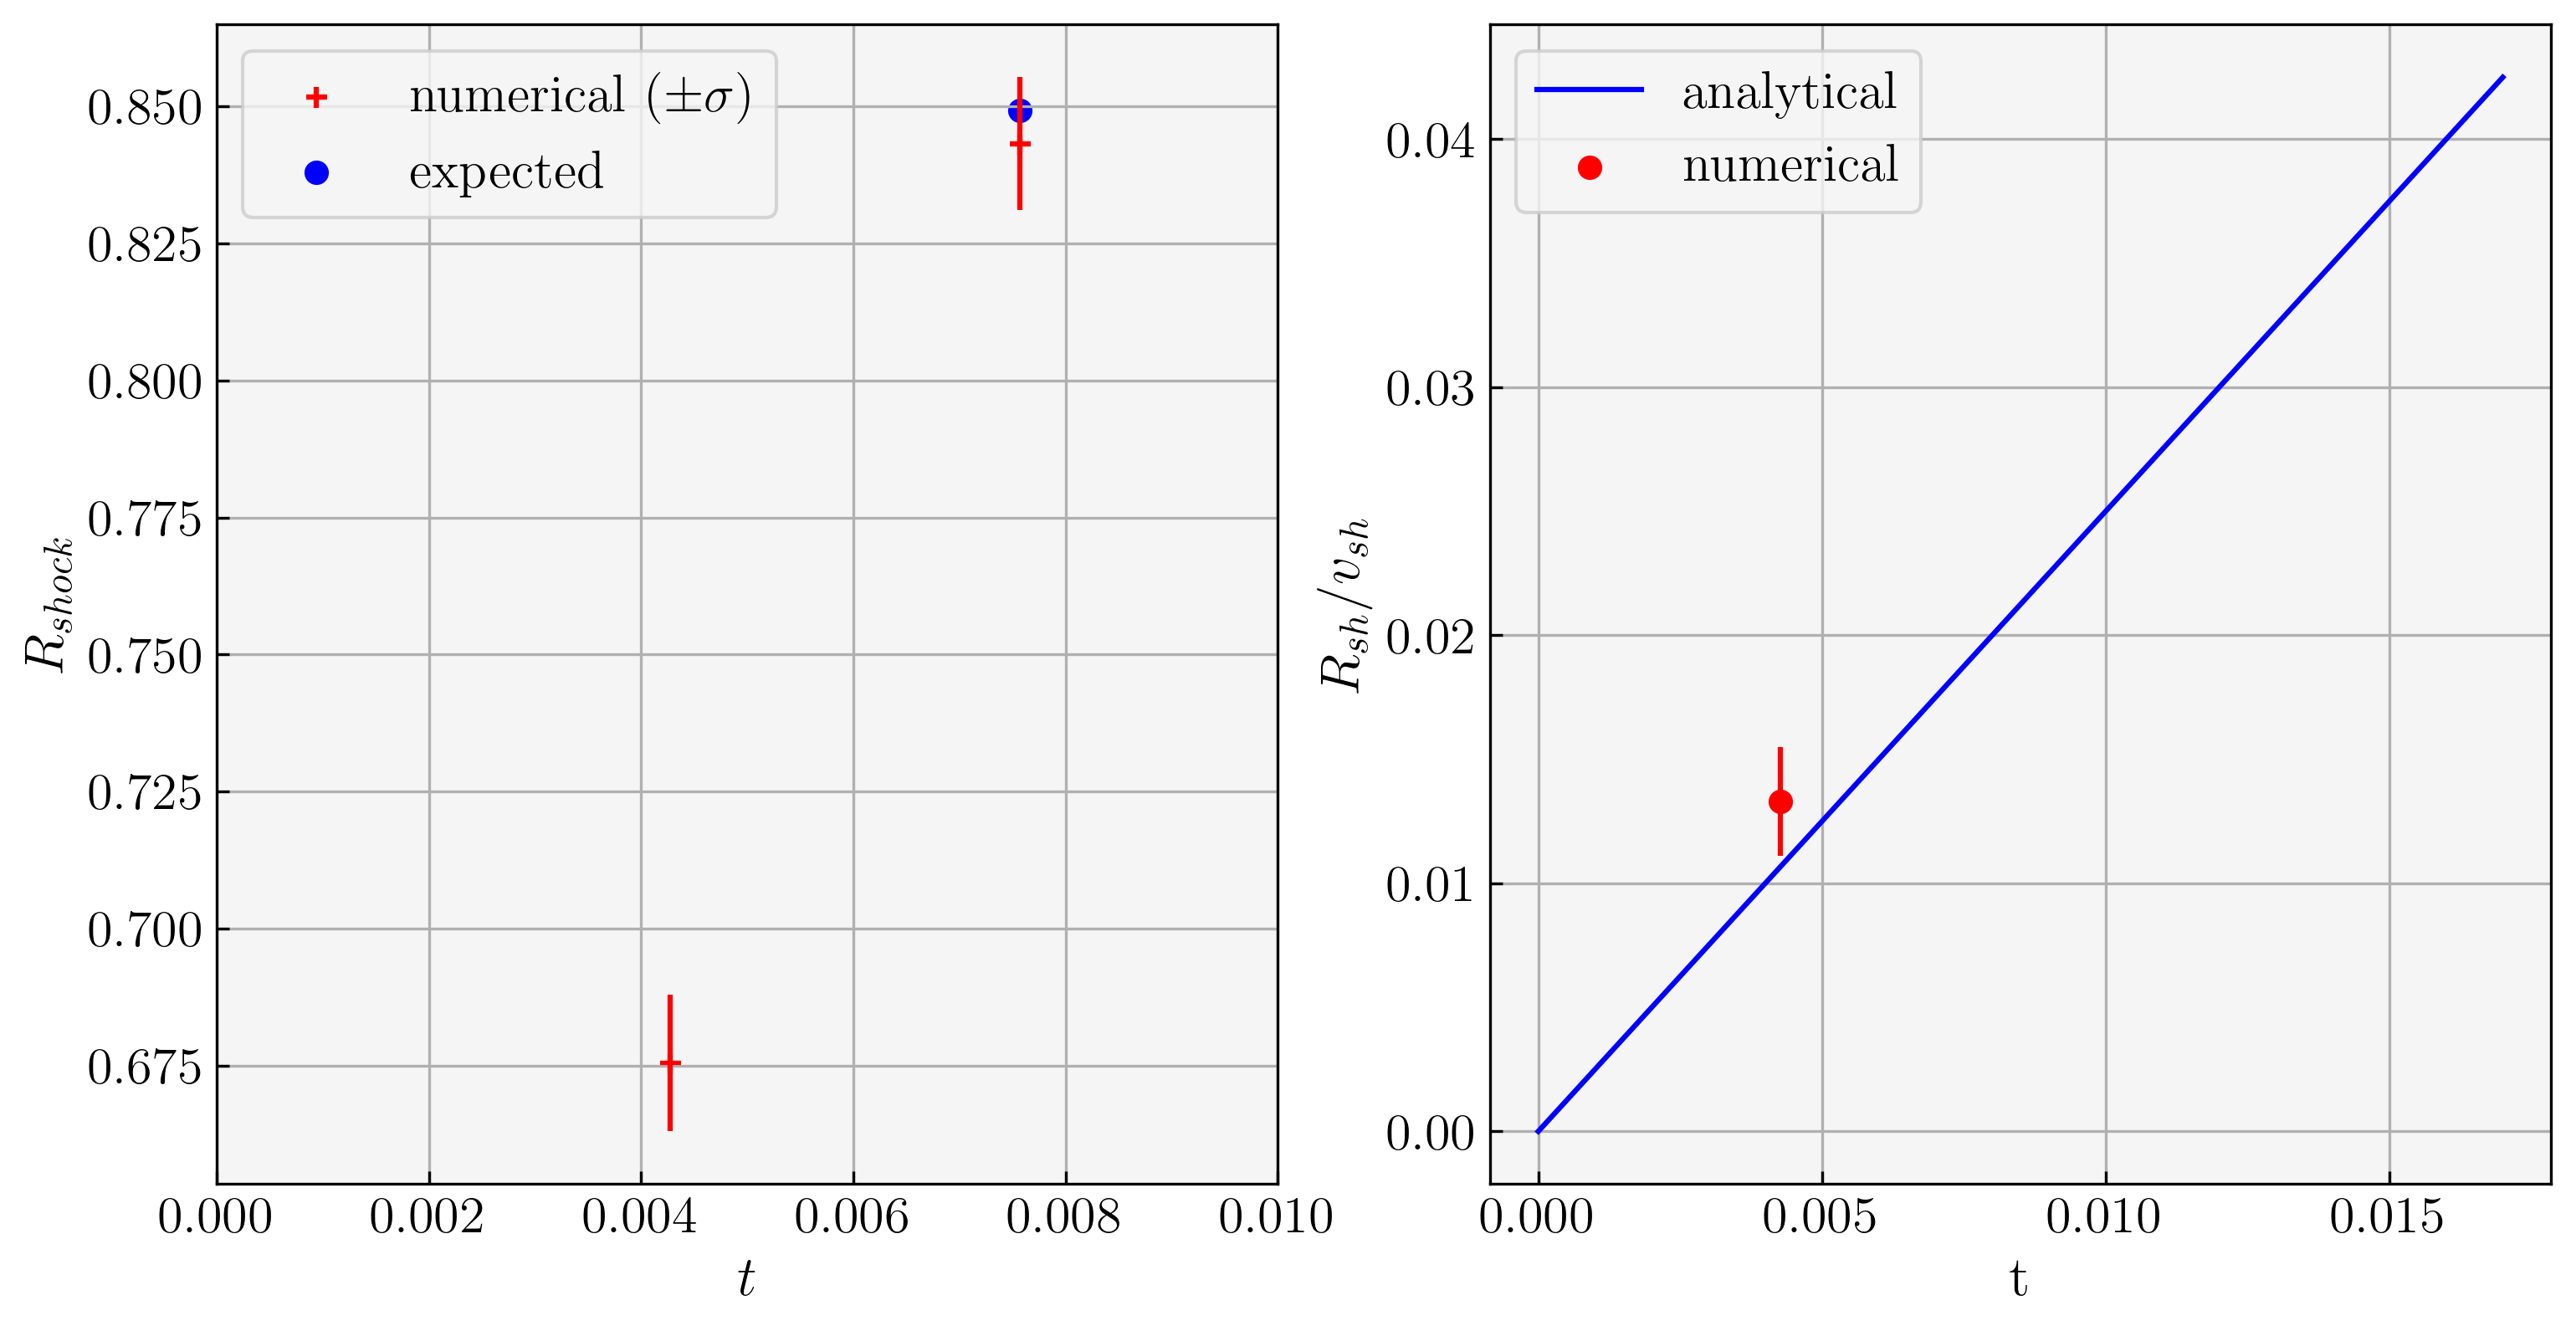

In [13]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].scatter([t100, tfinal], [R100, Rfinal], marker = '+', c = 'r', label = r'numerical ($\pm\sigma$)')
ax[0].errorbar([t100, tfinal], [R100, Rfinal], yerr = [errorR100,errorRfinal], c = 'r', fmt ='+') #
ax[0].scatter(tfinal, rfinal_expected,  c = 'b', label = 'expected')
ax[0].set_xlim(0,0.01)
ax[0].set_xlabel(r'$t$', fontsize = 16)
ax[0].set_ylabel(r'$R_{shock}$', fontsize = 16)
ax[0].legend(fontsize = 15)
ax[0].grid()

ax[1].plot(time, analytic_rv, color = 'b', label = 'analytical')
ax[1].scatter(tmiddle, ratiomiddle, c = 'r', label = 'numerical')
ax[1].errorbar(tmiddle, ratiomiddle, yerr = error_ratio, c = 'r')
ax[1].set_xlabel('t', fontsize = 16)
ax[1].set_ylabel(r'$R_{sh}/v_{sh}$', fontsize = 16)
ax[1].legend(fontsize = 15)
ax[1].grid()

plt.savefig('Figs/r_analyt.png')

In [23]:
gaspressure = IE * (gamma-1) #IE is energy density
# pressurerad = prel.sigma_T * Temp**4 # I can't to it because I don't know the value of sigma
# pressuretot = gaspressure + pressurerad

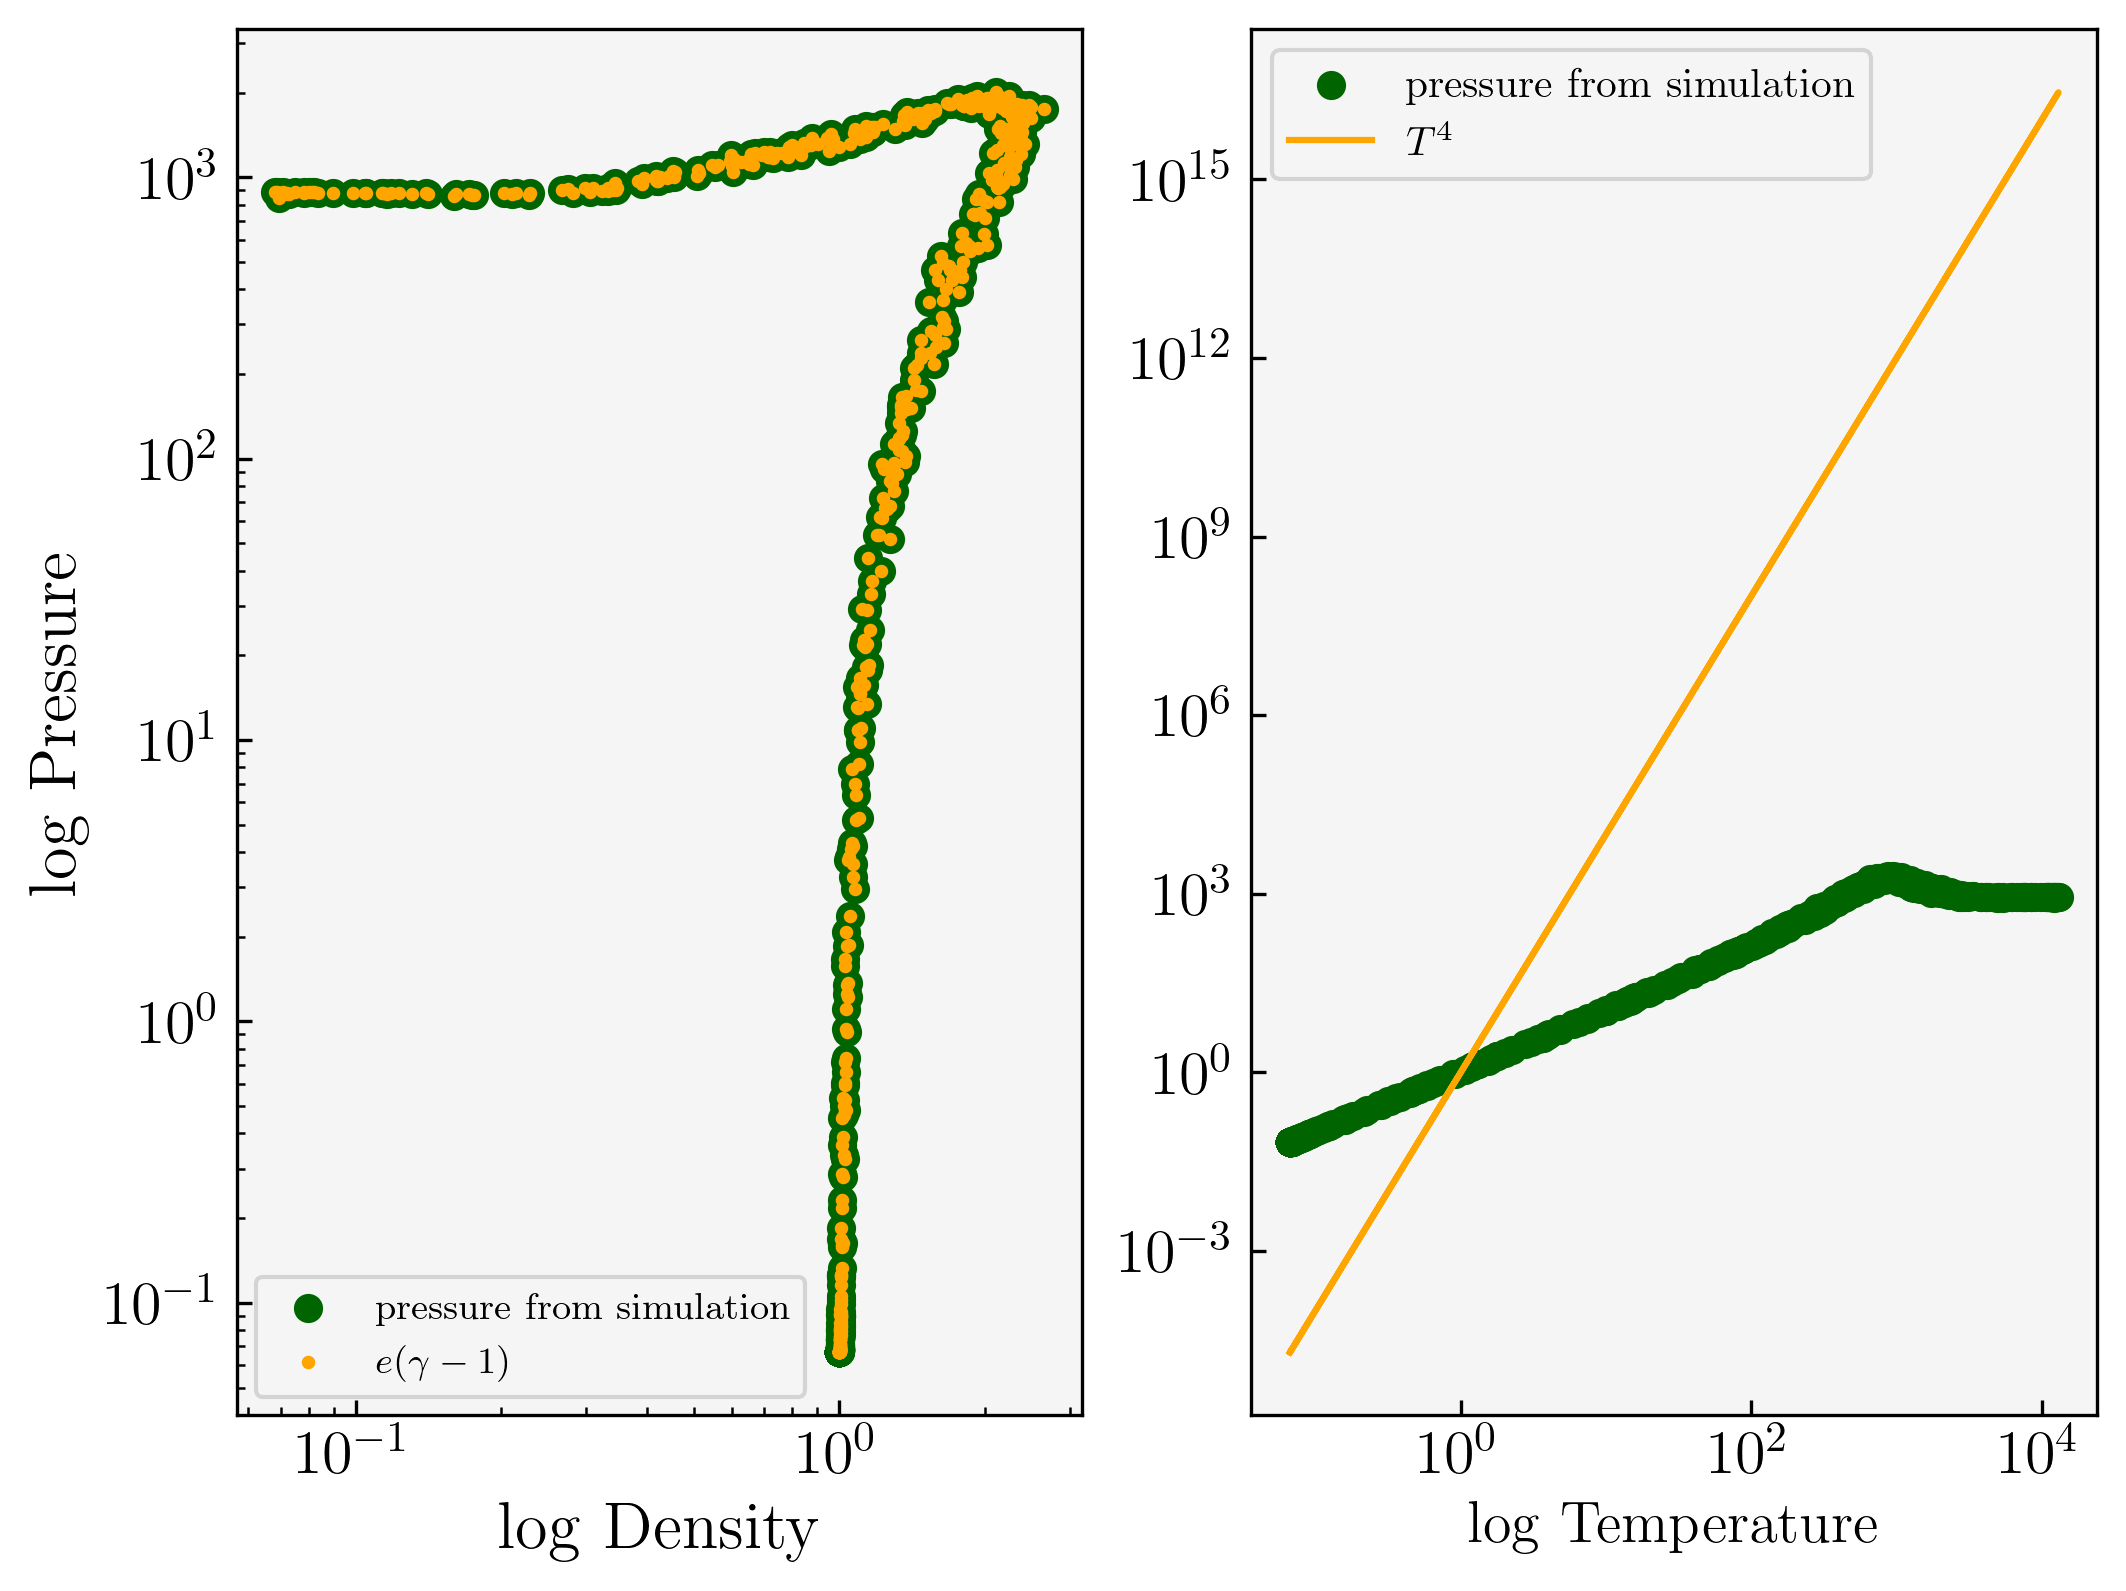

In [30]:
fig, ax = plt.subplots(1,2, figsize = (8,6))
ax[0].scatter(Den[::50], Press[::50], c = 'darkgreen', label = 'pressure from simulation')
ax[0].scatter(Den[::50], gaspressure[::50], c = 'orange', s = 5, label = r'$e(\gamma-1)$') # u is specific internal energy
#ax[0].plot(Den[::50], (Den**gamma)[::50], c = 'r', label = r'$\rho^\gamma$')
ax[0].set_xlabel(r'$\log$ Density', fontsize = 16)
ax[0].set_ylabel(r'$\log$ Pressure', fontsize = 16)
ax[0].legend(fontsize = 9)
ax[0].loglog()

ax[1].scatter(Temp[::50], Press[::50], c = 'darkgreen', label = 'pressure from simulation')
ax[1].plot(Temp[::50], (Temp**4)[::50], c = 'orange', label = r'$T^4$')
ax[1].set_xlabel(r'$\log$ Temperature', fontsize =14)
ax[1].legend(fontsize = 10)
ax[1].loglog()
 
plt.savefig(f'Figs/{folder}{snap}_Pdependence.png')

In [25]:
cs100 = np.zeros(len(indeces100))
for i,idx in enumerate(indeces100):
    idx = int(idx)
    cs100[i] = np.sqrt(gamma*Press[idx]/Den[idx])

In [26]:
analytical_mach = vshockmiddle/cs100

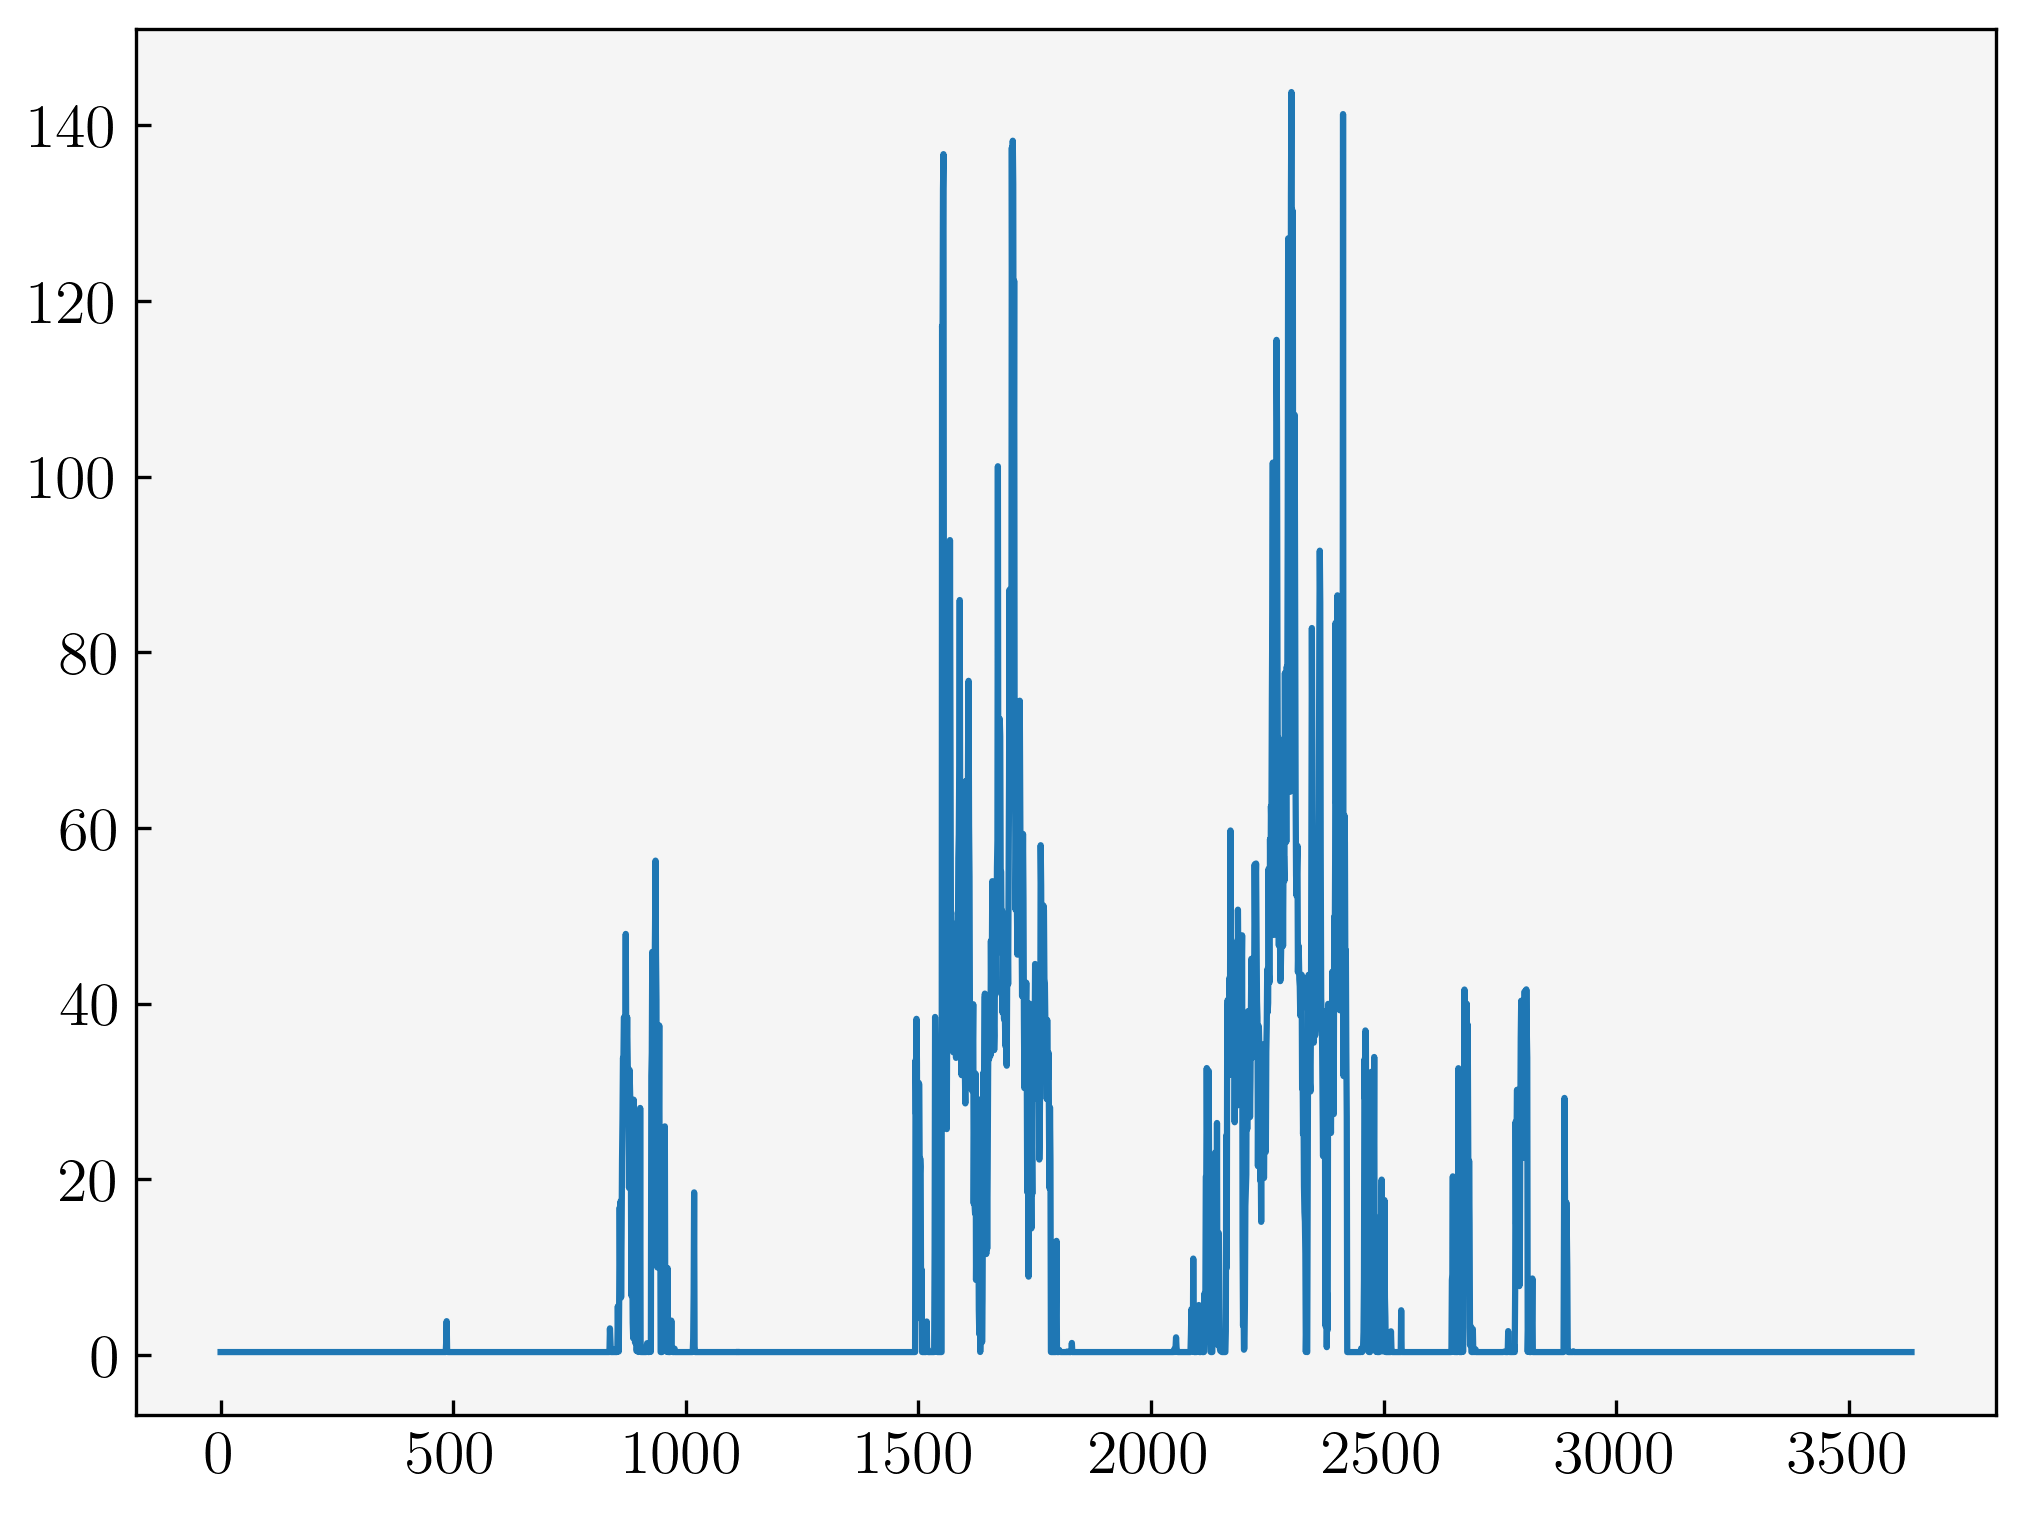

In [27]:
plt.plot(cs100)
plt.plot(vshockmiddle)

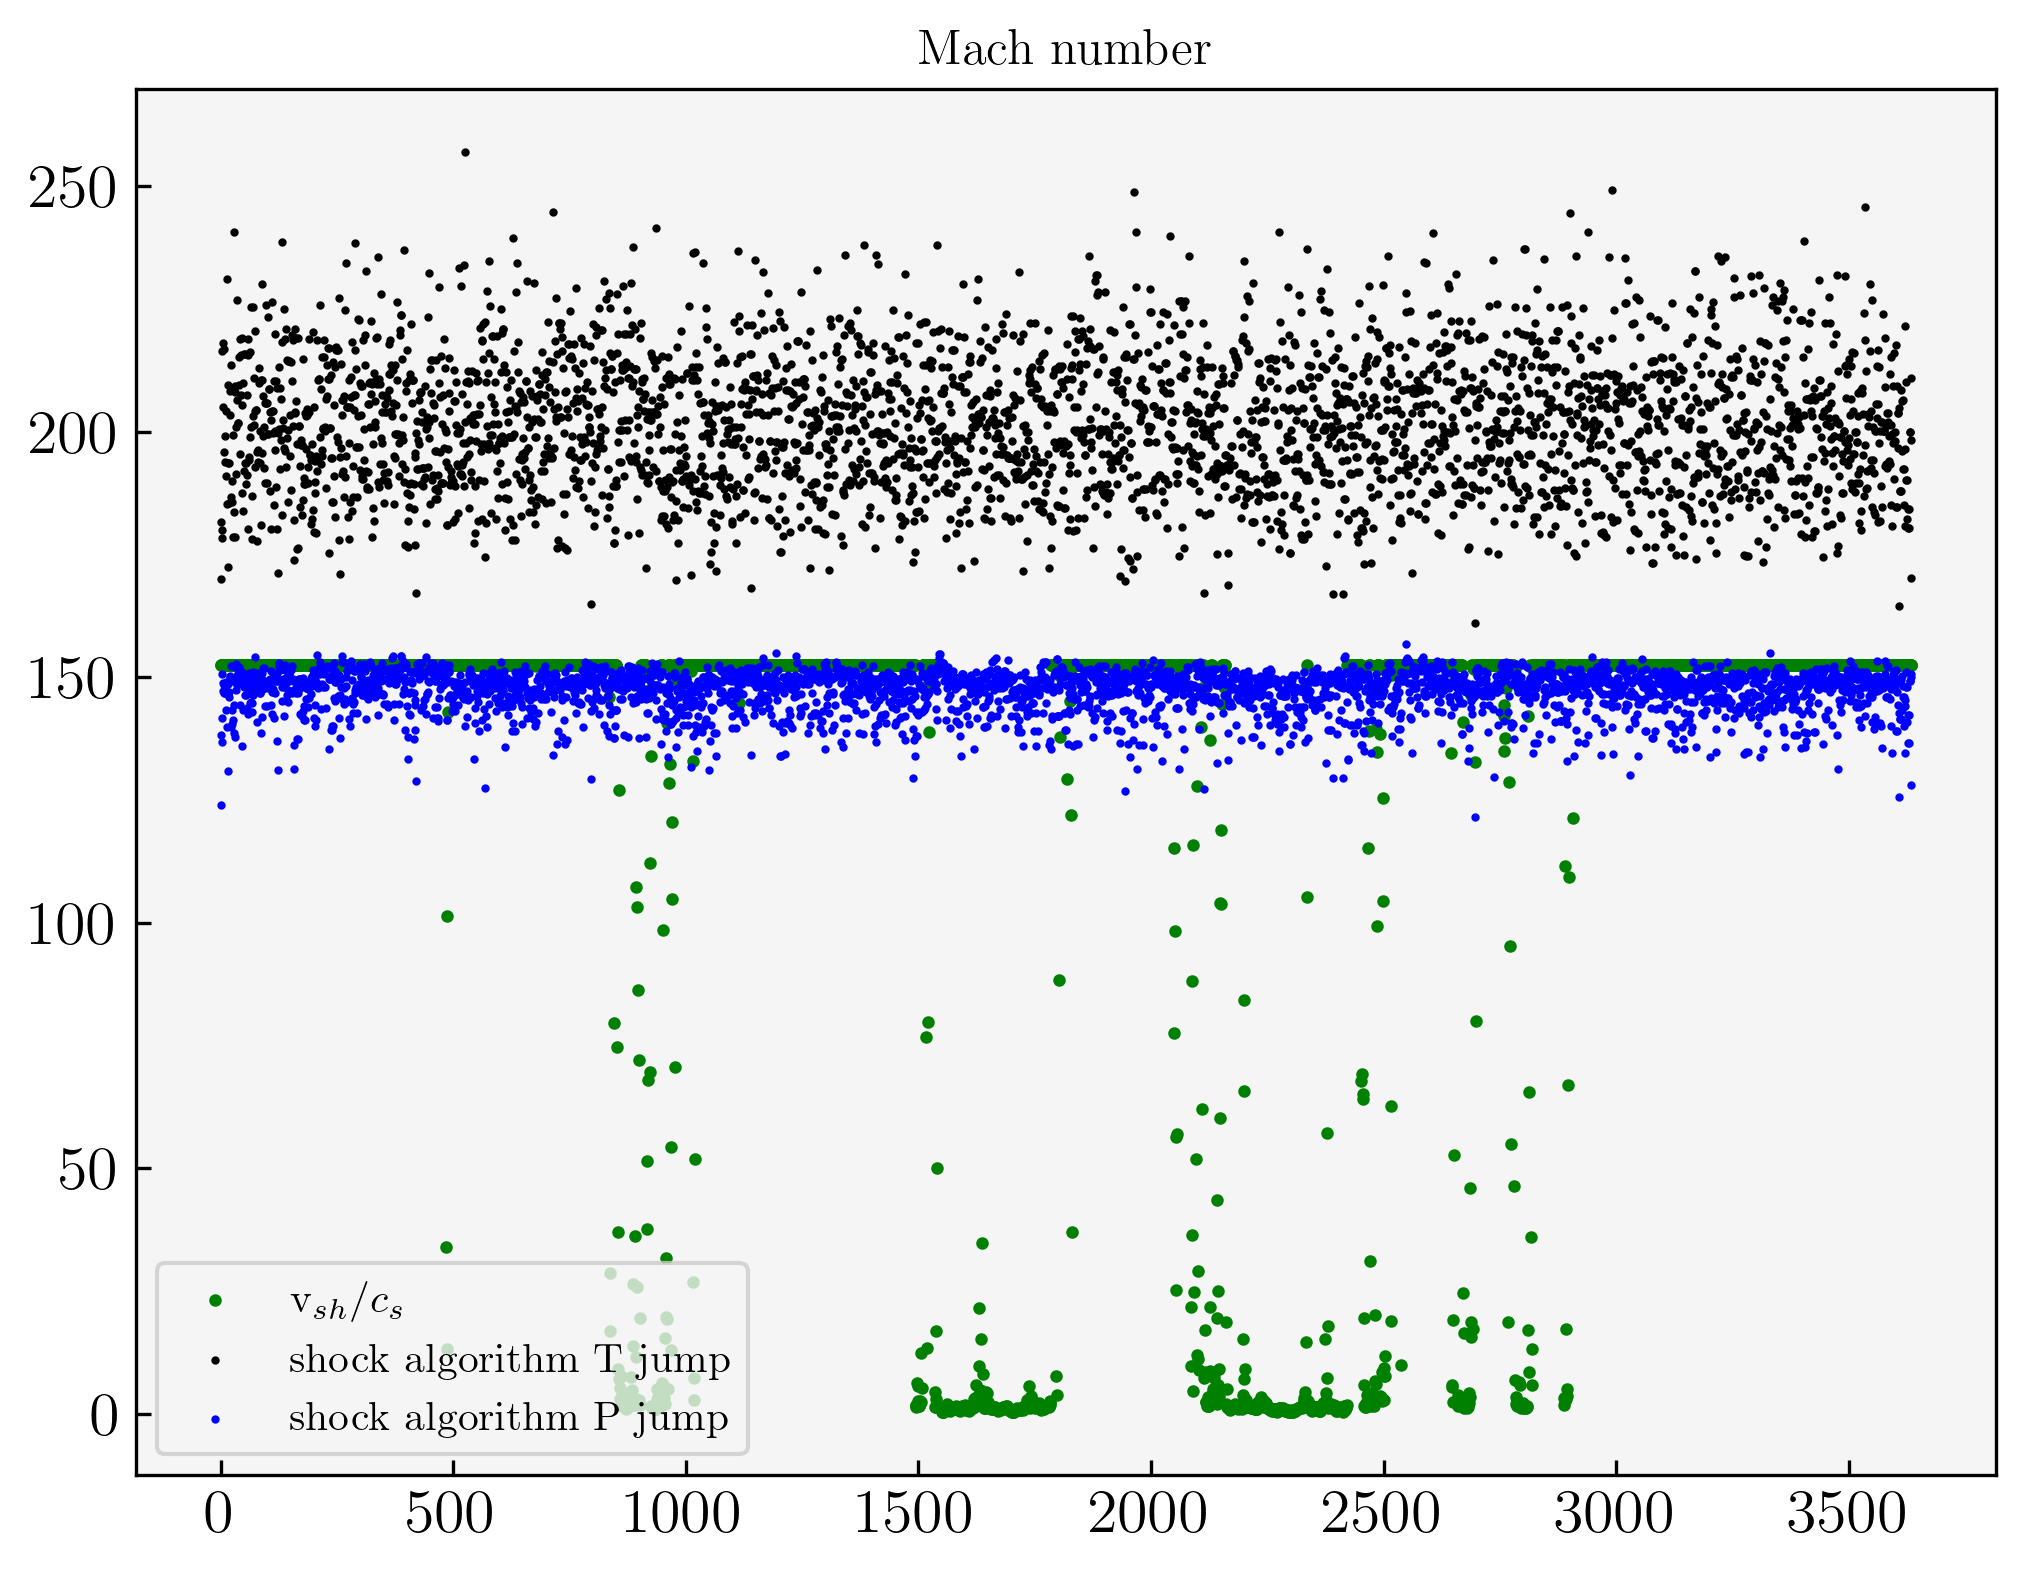

In [28]:
plt.scatter(np.arange(len(analytical_mach)), analytical_mach, s = 4, c = 'green', label = r'v$_{sh}/c_s$')
plt.scatter(np.arange(len(mach100)), mach100, s = 1, c = 'k', label = 'shock algorithm T jump')
plt.scatter(np.arange(len(machP100)), machP100, s = 1, c = 'b', label = 'shock algorithm P jump')

plt.legend(loc = 'lower left')
plt.title('Mach number')
plt.savefig('Figs/mach_analytical.png')


(-1.0, 1.0)

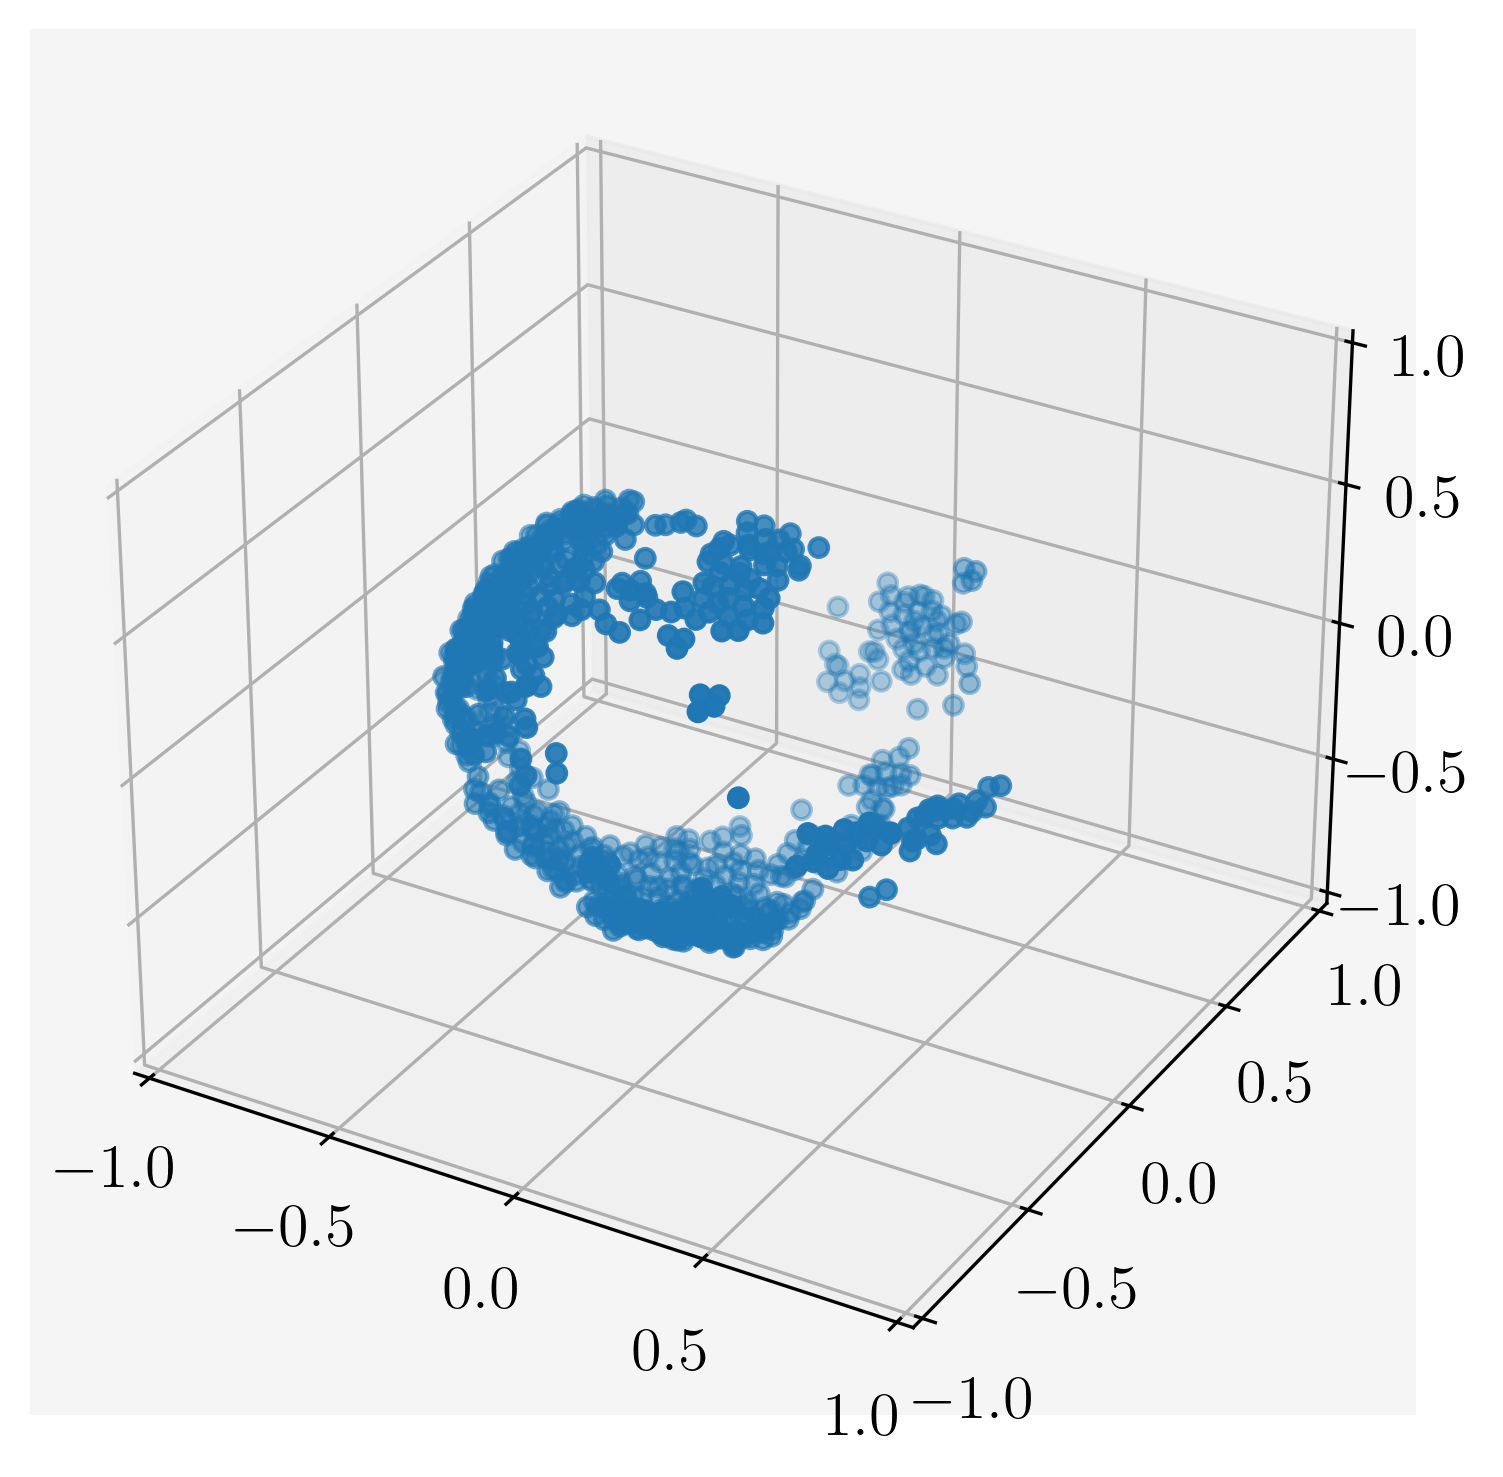

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xshock100[analytical_mach<150], yshock100[analytical_mach<150], zshock100[analytical_mach<150])
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)